In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
## plotting variables
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/02_figures/'
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

### Read invivo/exvivo results

In [3]:
IPA_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/01_data/ASK_joint/IPA_results/'

In [4]:
## read in vivo regulons
ipa_exvivo = pd.read_csv(IPA_dir + 'IPA_vascular_EC_exvivo.csv', sep = ',')
ipa_exvivo.columns = ['Ingenuity Canonical Pathways','exvivo_minus_log_p_val','exvivo_z_score']
ipa_exvivo = ipa_exvivo[-ipa_exvivo['exvivo_z_score'].isin(['#NUM!'])]
ipa_exvivo['exvivo_z_score'] = ipa_exvivo['exvivo_z_score'].apply(pd.to_numeric, errors = 'coerce')
ipa_exvivo

,Ingenuity Canonical Pathways,exvivo_minus_log_p_val,exvivo_z_score
0,Senescence Pathway,19.7,2.861
2,EIF2 Signaling,17.4,-3.394
3,Pulmonary Fibrosis Idiopathic Signaling Pathway,13.3,5.983
4,Hepatic Fibrosis Signaling Pathway,12.4,4.401
6,Autophagy,11.6,1.970
...,...,...,...
688,Th17 Activation Pathway,0.0,3.128
689,SPINK1 Pancreatic Cancer Pathway,0.0,-1.265
690,T Cell Exhaustion Signaling Pathway,0.0,1.214
691,Systemic Lupus Erythematosus In T Cell Signali...,0.0,1.091


In [5]:
## read in vivo regulons
ipa_invivo = pd.read_csv(IPA_dir + 'IPA_vascular_EC_invivo.csv', sep = ',')
ipa_invivo.columns = ['Ingenuity Canonical Pathways','invivo_minus_log_p_val','invivo_z_score']
ipa_invivo = ipa_invivo[-ipa_invivo['invivo_z_score'].isin(['#NUM!'])]
ipa_invivo['invivo_z_score'] = ipa_invivo['invivo_z_score'].apply(pd.to_numeric, errors = 'coerce')
ipa_invivo

,Ingenuity Canonical Pathways,invivo_minus_log_p_val,invivo_z_score
0,EIF2 Signaling,14.50,2.469
1,Huntington's Disease Signaling,9.49,-1.671
3,Sirtuin Signaling Pathway,9.31,-2.534
4,Estrogen Receptor Signaling,8.98,-0.478
5,HIF1α Signaling,8.73,-0.980
...,...,...,...
619,Th17 Activation Pathway,0.00,-0.302
621,T Cell Exhaustion Signaling Pathway,0.00,0.000
622,Systemic Lupus Erythematosus In T Cell Signali...,0.00,0.309
623,Systemic Lupus Erythematosus In B Cell Signali...,0.00,-1.809


In [6]:
ipa = pd.merge(ipa_invivo, ipa_exvivo, on='Ingenuity Canonical Pathways')
ipa

,Ingenuity Canonical Pathways,invivo_minus_log_p_val,invivo_z_score,exvivo_minus_log_p_val,exvivo_z_score
0,EIF2 Signaling,14.50,2.469,17.40,-3.394
1,Huntington's Disease Signaling,9.49,-1.671,2.21,0.590
2,Sirtuin Signaling Pathway,9.31,-2.534,10.90,1.410
3,Estrogen Receptor Signaling,8.98,-0.478,9.57,2.354
4,HIF1α Signaling,8.73,-0.980,8.09,3.491
...,...,...,...,...,...
368,Th17 Activation Pathway,0.00,-0.302,0.00,3.128
369,T Cell Exhaustion Signaling Pathway,0.00,0.000,0.00,1.214
370,Systemic Lupus Erythematosus In T Cell Signali...,0.00,0.309,0.00,1.091
371,Systemic Lupus Erythematosus In B Cell Signali...,0.00,-1.809,0.00,2.919


In [9]:
ipa_diverging_2 = ipa[(ipa['invivo_z_score'] > +1) & (ipa['exvivo_z_score'] < -1)]
ipa_diverging_2.head(25)

,Ingenuity Canonical Pathways,invivo_minus_log_p_val,invivo_z_score,exvivo_minus_log_p_val,exvivo_z_score
0,EIF2 Signaling,14.500,2.469,17.400,-3.394
15,Oxidative Phosphorylation,6.090,1.461,2.570,-2.596
25,PPARα/RXRα Activation,5.340,1.061,4.740,-2.449
52,Apoptosis Signaling,4.250,2.985,4.580,-1.947
138,Purine Nucleotides De Novo Biosynthesis II,2.470,2.236,1.630,-2.449
157,"PD-1, PD-L1 cancer immunotherapy pathway",2.170,1.147,5.530,-1.718
171,Purine Nucleotides Degradation II (Aerobic),1.970,1.633,1.760,-1.134
173,Urate Biosynthesis/Inosine 5'-phosphate Degrad...,1.950,1.342,1.600,-1.633
174,Colanic Acid Building Blocks Biosynthesis,1.950,1.342,2.930,-2.333
245,Spliceosomal Cycle,1.180,1.667,0.000,-1.265


In [10]:
ipa_diverging_1 = ipa[(ipa['invivo_z_score'] < -1) & (ipa['exvivo_z_score'] > +1)]
ipa_diverging_1.head(25)

,Ingenuity Canonical Pathways,invivo_minus_log_p_val,invivo_z_score,exvivo_minus_log_p_val,exvivo_z_score
2,Sirtuin Signaling Pathway,9.31,-2.534,10.900,1.410
5,Regulation of eIF4 and p70S6K Signaling,8.70,-1.414,8.990,2.117
14,Oncostatin M Signaling,6.21,-1.291,1.930,2.000
19,UVA-Induced MAPK Signaling,5.73,-1.291,3.440,2.985
20,Autophagy,5.70,-1.677,11.600,1.970
21,Coronavirus Pathogenesis Pathway,5.64,-2.111,11.200,2.037
22,Apelin Endothelial Signaling Pathway,5.57,-1.569,5.860,1.938
27,Colorectal Cancer Metastasis Signaling,5.23,-2.160,8.970,3.055
28,Mouse Embryonic Stem Cell Pluripotency,5.19,-1.177,7.180,3.063
30,Thrombin Signaling,5.15,-1.567,8.340,2.250


In [11]:
pathways = ['EIF2 Signaling','PPARα/RXRα Activation','Apoptosis Signaling','PD-1, PD-L1 cancer immunotherapy pathway',
            'Sirtuin Signaling Pathway','Oncostatin M Signaling','UVA-Induced MAPK Signaling','Apelin Endothelial Signaling Pathway',
            'Thrombin Signaling','JAK/STAT Signaling','CNTF Signaling','IL-8 Signaling','BMP signaling pathway']

In [12]:
ipa = ipa[ipa['Ingenuity Canonical Pathways'].isin(pathways)]

In [13]:
diverging_invivo = ipa[['Ingenuity Canonical Pathways','invivo_z_score']]
diverging_invivo = diverging_invivo.sort_values(by = 'invivo_z_score', ascending = False)
diverging_invivo.rename(columns = {'invivo_z_score':'z-score'}, inplace = True)
diverging_invivo['condition'] = 'invivo'
diverging_exvivo = ipa[['Ingenuity Canonical Pathways','exvivo_z_score']]
diverging_exvivo.rename(columns = {'exvivo_z_score':'z-score'}, inplace = True)
diverging_exvivo['condition'] = 'exvivo'

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/tmp/ipykernel_2180772/1890095800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverging_exvivo['condition'] = 'exvivo'


In [14]:
diverging_induced = pd.concat([diverging_invivo, diverging_exvivo], axis=0)

In [15]:
diverging_induced

,Ingenuity Canonical Pathways,z-score,condition
52,Apoptosis Signaling,2.985,invivo
0,EIF2 Signaling,2.469,invivo
157,"PD-1, PD-L1 cancer immunotherapy pathway",1.147,invivo
25,PPARα/RXRα Activation,1.061,invivo
56,BMP signaling pathway,-1.147,invivo
14,Oncostatin M Signaling,-1.291,invivo
19,UVA-Induced MAPK Signaling,-1.291,invivo
30,Thrombin Signaling,-1.567,invivo
22,Apelin Endothelial Signaling Pathway,-1.569,invivo
55,IL-8 Signaling,-1.667,invivo


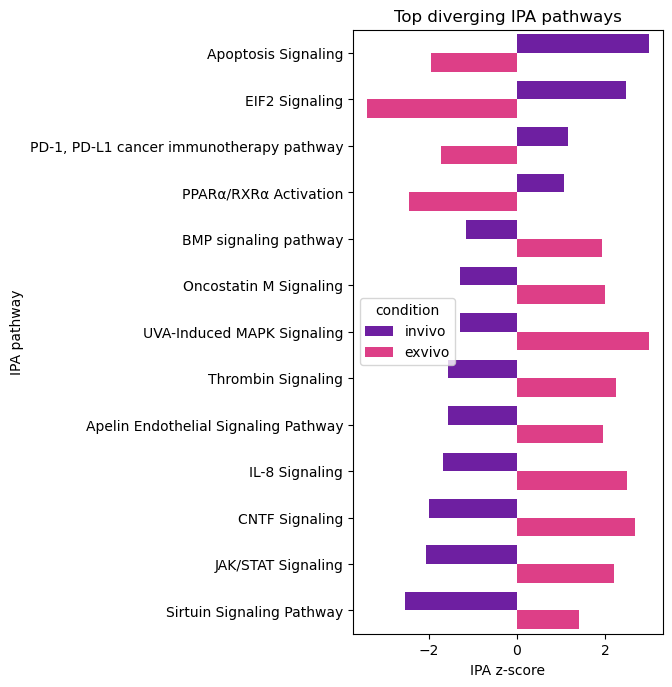

In [16]:
sb.barplot(data = diverging_induced,
           x = 'z-score',
           y = 'Ingenuity Canonical Pathways',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top diverging IPA pathways',
                xlabel = 'IPA z-score',
                ylabel = 'IPA pathway',
                #xlim = (-1.5,2)
               )
plt.savefig(fig_dir + 'barplot_vascular_EC_IPA_diverging_pathways.pdf')
plt.show()